In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
data = pd.read_csv('data-csv/chs2013_public.csv')

In [45]:
len(data.columns)

175

In [46]:
len(data)

8698

In [47]:
data = data[['daysalc30', 'mood3', 'exercise13', 'fruitveg', 'tolddepression']]

In [48]:
data.columns = ['alcohol', 'sleep', 'exercise', 'nutrition', 'mood']

In [49]:
data = data.dropna()

In [50]:
len(data)

8357

In [51]:
(data['mood'] == 1).sum()

1307

In [52]:
(data['mood'] == 2).sum()

7050

In [54]:
from sklearn.utils import resample

# separate majority and minority classes
df_majority = data[data.mood == 2]
df_minority = data[data.mood == 1]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace = True, # sample with replacement
                                n_samples = 7050, # to match majority class
                                random_state = 123) # reproducable results

# combine majority class with unsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# display new class counts
df_upsampled.mood.value_counts()

1.0    7050
2.0    7050
Name: mood, dtype: int64

In [55]:
train, test = train_test_split(df_upsampled, test_size = 0.2)

In [56]:
train.head()

,alcohol,sleep,exercise,nutrition,mood
6226,4.3,5,1.0,2.0,1.0
5432,1.0,5,1.0,2.0,2.0
5601,3.0,5,1.0,2.0,2.0
817,0.0,4,1.0,2.0,2.0
5000,0.0,5,2.0,2.0,2.0


In [85]:
train_x = train.iloc[:, 2:4]
train_y = train.iloc[:, 4]

In [86]:
train_x.head()

,exercise,nutrition
6226,1.0,2.0
5432,1.0,2.0
5601,1.0,2.0
817,1.0,2.0
5000,2.0,2.0


In [87]:
test_x = test.iloc[:, 2:4]
test_y = test.iloc[:, 4]

In [88]:
from sklearn.linear_model import BayesianRidge
BayesianRidge = BayesianRidge(compute_score = True)
BayesianRidge.fit(train_x, train_y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [89]:
BayesianRidge_pred_y = BayesianRidge.predict(test_x)

In [90]:
BayesianRidge_RMSE = sqrt(mean_squared_error(test_y, BayesianRidge_pred_y))
BayesianRidge_RMSE

0.49881628150985424

In [91]:
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor()
RandomForest.fit(train_x, train_y)

C:\Users\pishi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [92]:
RandomForest_pred_y = RandomForest.predict(test_x)

In [93]:
RandomForest_RMSE = sqrt(mean_squared_error(test_y, RandomForest_pred_y))
RandomForest_RMSE

0.4979419643328254

In [94]:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
LinearRegression_pred_y = LinearRegression.predict(test_x)

In [96]:
LinearRegression_RMSE = sqrt(mean_squared_error(test_y, LinearRegression_pred_y))
LinearRegression_RMSE

0.498819065704649

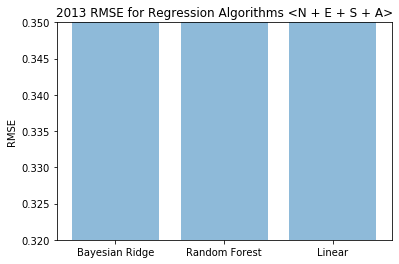

In [69]:
import numpy as np
import matplotlib.pyplot as plt
models = ('Bayesian Ridge', 'Random Forest', 'Linear')
y_pos = np.arange(len(models))
rmse = [BayesianRidge_RMSE, RandomForest_RMSE, LinearRegression_RMSE]

plt.bar(y_pos, rmse, align = 'center', alpha = 0.5)
plt.xticks(y_pos, models)
plt.ylabel('RMSE')
plt.title('2013 RMSE for Regression Algorithms <N + E + S + A>')
plt.ylim(0.32, 0.35)

plt.show()